In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


male      676
female    662
Name: sex, dtype: int64


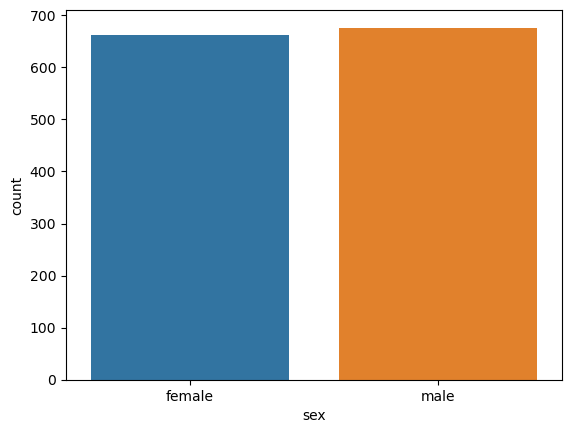

In [10]:
ax = sns.countplot(x = 'sex', data=df)
print(df['sex'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


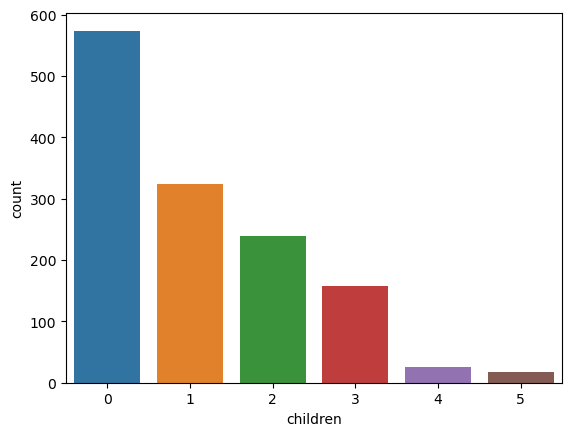

In [11]:
ax = sns.countplot(x = 'children', data=df)
print(df['children'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


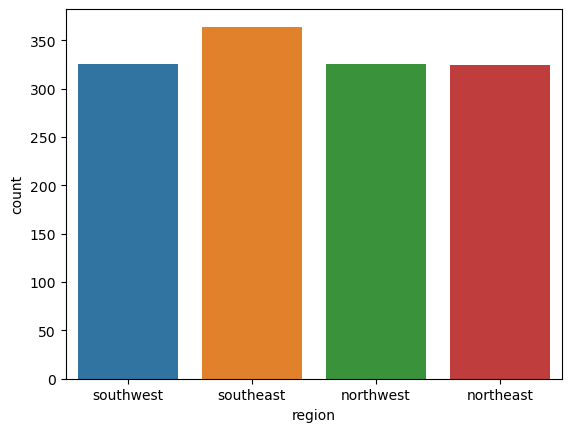

In [12]:
ax = sns.countplot(x = 'region', data=df)
print(df['region'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


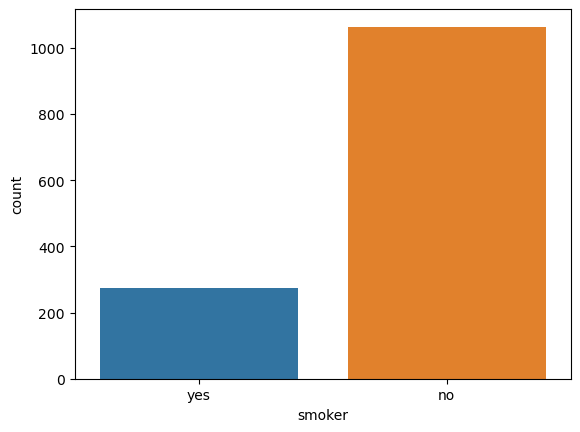

In [13]:
ax = sns.countplot(x = 'smoker', data=df)
print(df['smoker'].value_counts())

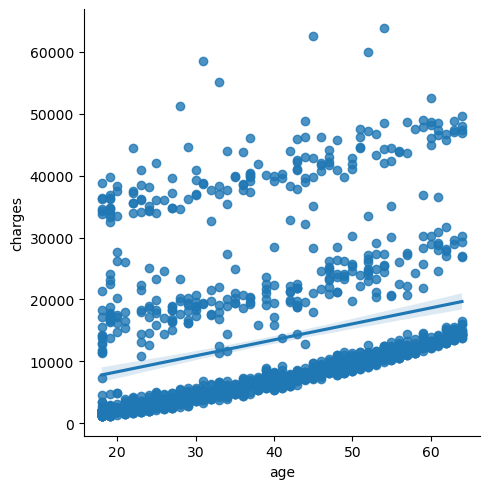

In [16]:
sns.lmplot(x='age',y='charges',data=df)

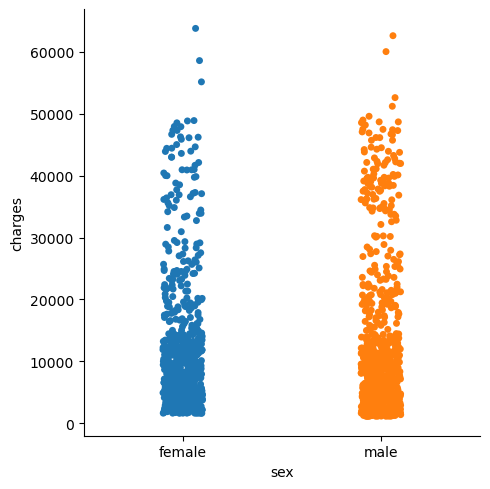

In [20]:
sns.catplot(x= 'sex', y = 'charges',data=df)
plt.show()

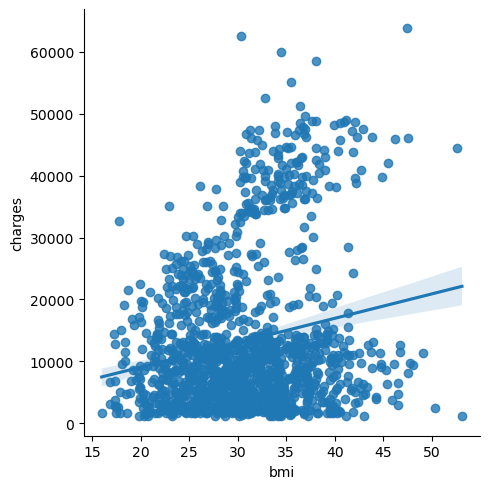

In [21]:
sns.lmplot(x='bmi',y='charges',data=df)

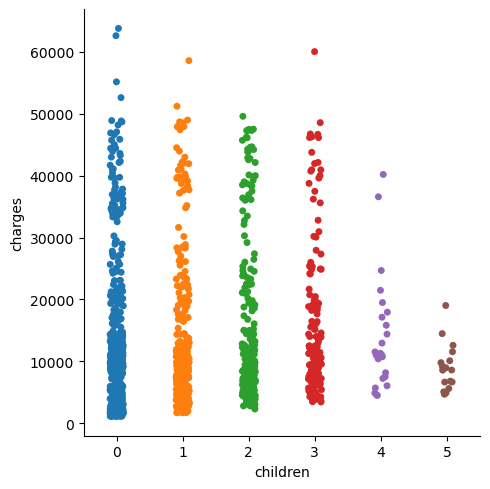

In [23]:
sns.catplot(x= 'children', y = 'charges',data=df)
plt.show()

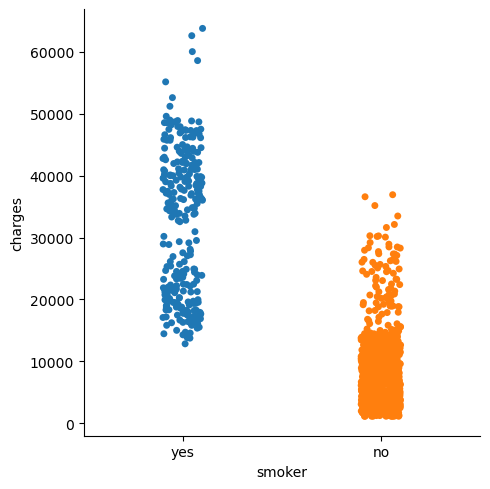

In [24]:
sns.catplot(x= 'smoker', y = 'charges',data=df)
plt.show()

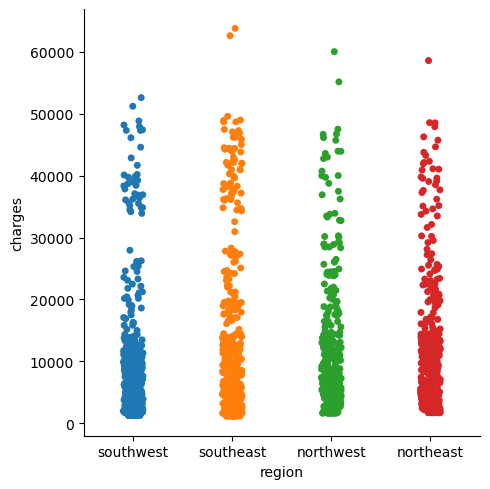

In [25]:
sns.catplot(x= 'region', y = 'charges',data=df)
plt.show()

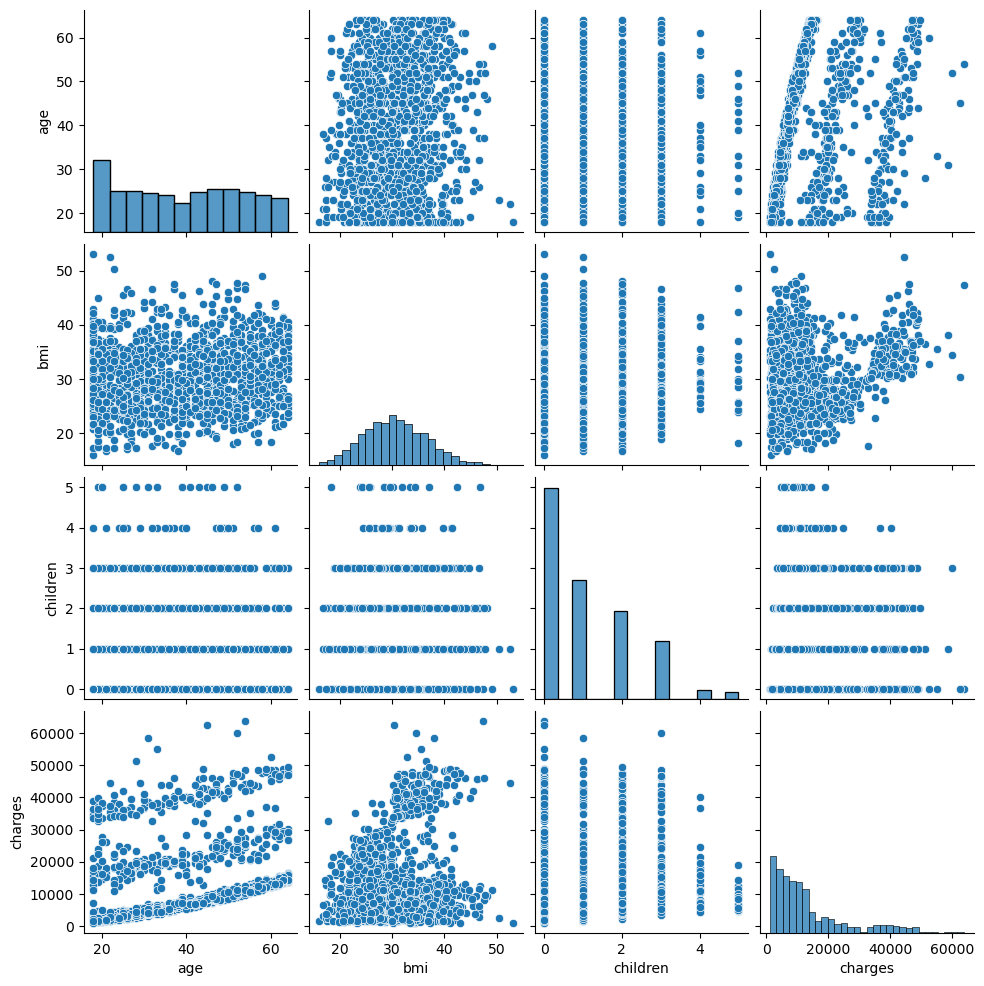

In [26]:
sns.pairplot(data=df)
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
object_columns = df.select_dtypes(include='object')
object_columns

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [30]:
object_type_columns = list(object_columns.columns)

object_type_columns

['sex', 'smoker', 'region']

In [33]:
df_dummies = pd.get_dummies(df[object_type_columns])

In [34]:
df_dummies.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [35]:
df = df.join(df_dummies)

In [36]:
df.shape

(1338, 15)

In [38]:
df.drop(columns = object_type_columns,axis=1,inplace= True)

In [39]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


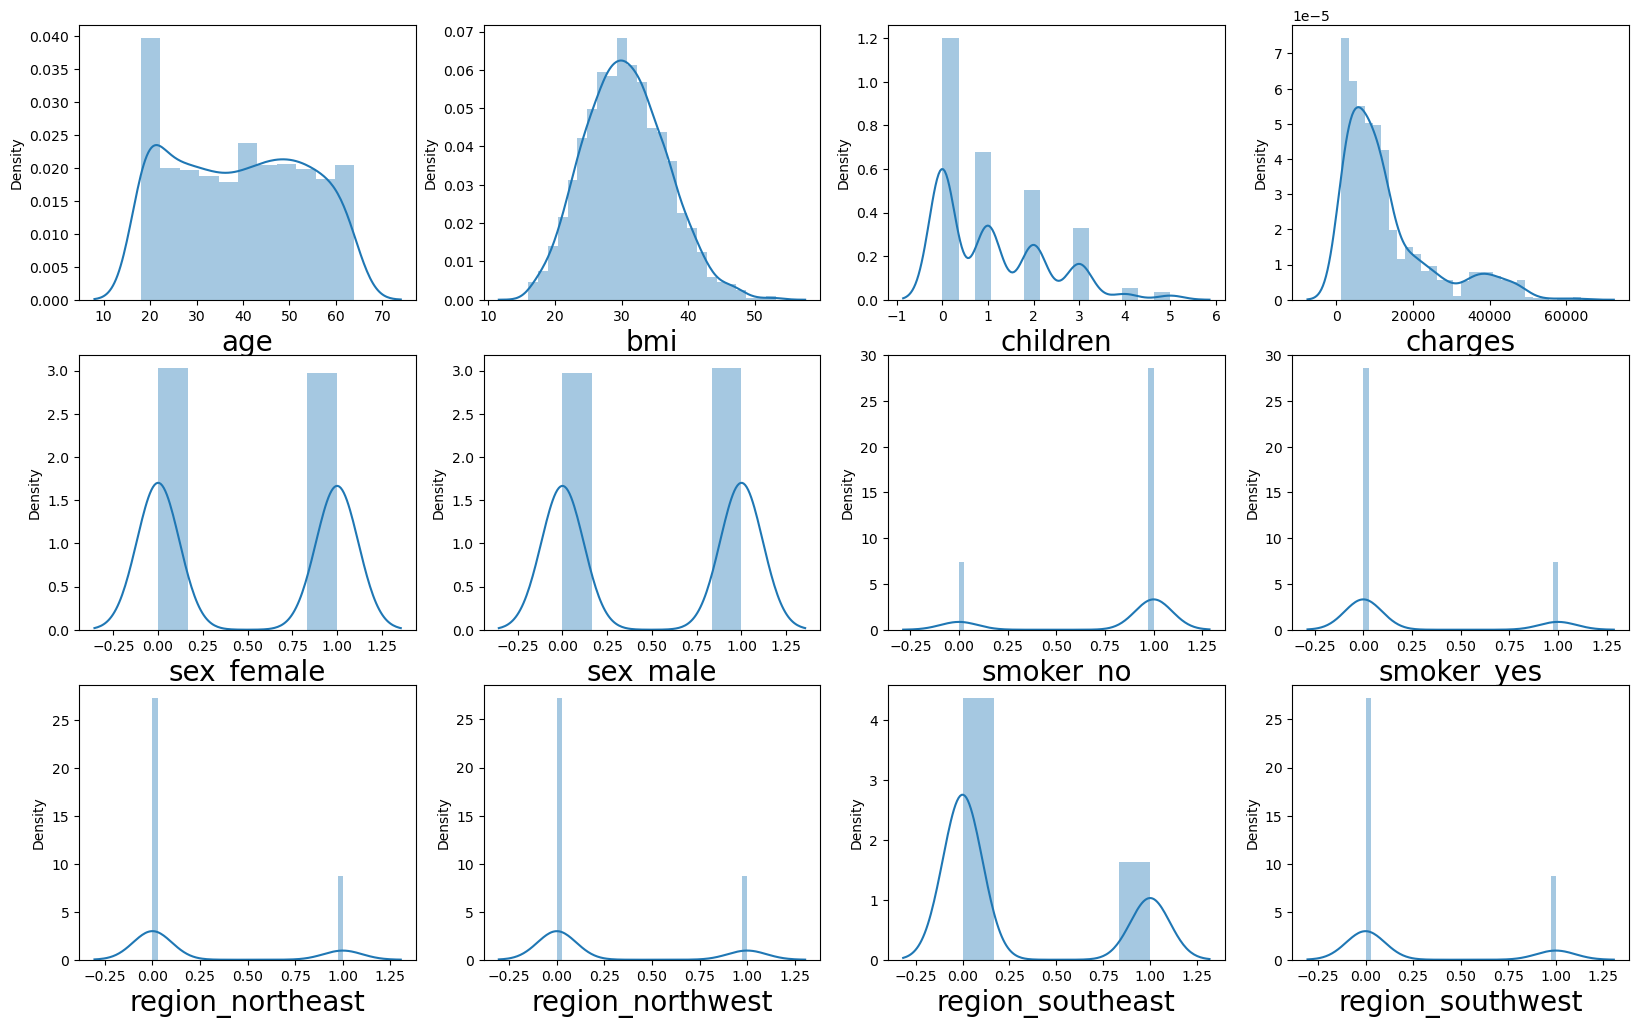

In [40]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()    

In [41]:
df.skew()

age                 0.055673
bmi                 0.284047
children            0.938380
charges             1.515880
sex_female          0.020951
sex_male           -0.020951
smoker_no          -1.464766
smoker_yes          1.464766
region_northeast    1.205161
region_northwest    1.200409
region_southeast    1.025621
region_southwest    1.200409
dtype: float64

In [42]:
df['children'] = np.cbrt(df['children'])

In [43]:
df.skew()

age                 0.055673
bmi                 0.284047
children           -0.097116
charges             1.515880
sex_female          0.020951
sex_male           -0.020951
smoker_no          -1.464766
smoker_yes          1.464766
region_northeast    1.205161
region_northwest    1.200409
region_southeast    1.025621
region_southwest    1.200409
dtype: float64

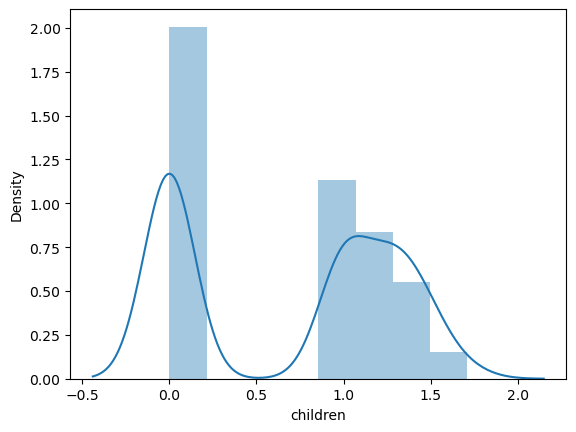

In [44]:
sns.distplot(df['children'],hist='False')
plt.show()

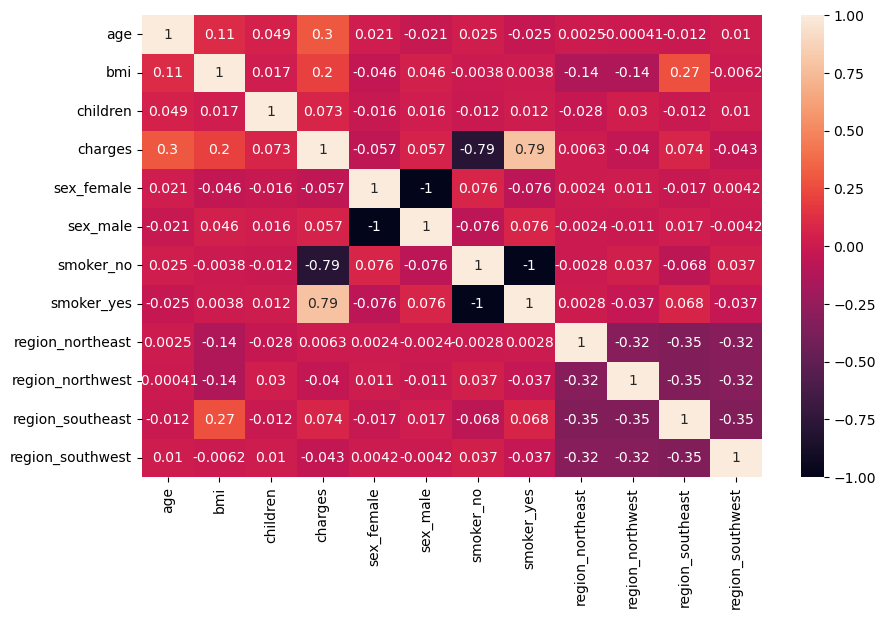

In [47]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [48]:
x = df.drop('charges',axis=1)
y = df['charges']

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.017414,age
1,1.106655,bmi
2,1.004511,children
3,inf,sex_female
4,inf,sex_male
5,inf,smoker_no
6,inf,smoker_yes
7,inf,region_northeast
8,inf,region_northwest
9,inf,region_southeast


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [53]:
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    maxRs=i
print('train_test_split result at random_state',maxRs)  

train_test_split result at random_state 199


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=199)

In [58]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.7620561078711844
Accuracy_test 0.7172192701626934
MAE 4054.2249856967233
MSE 37084599.04862442
RMSE 6089.712558785055


In [59]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = gbr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9156058291135455
Accuracy_test 0.8211859344034553
MAE 2643.718201548428
MSE 23450140.78829722
RMSE 4842.534541776364


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [62]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rfr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9787599078656215
Accuracy_test 0.8031631292767142
MAE 2841.789895207188
MSE 25813698.242304873
RMSE 5080.718280155364


In [63]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = dt.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.6703572882829942
MAE 3027.4542324626864
MSE 43230201.0124937
RMSE 6574.967757525028


In [64]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = knn.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.55458547953938
Accuracy_test 0.31965272077815776
MAE 6167.853986248259
MSE 89222508.47248484
RMSE 9445.766695852955


In [65]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lasso.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.7620558995556235
Accuracy_test 0.7172088498029088
MAE 4054.315714362703
MSE 37085965.601659246
RMSE 6089.824759519706


In [66]:
rd = Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rd.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.762049435183086
Accuracy_test 0.7174826935389089
MAE 4056.8093893935825
MSE 37050053.023184106
RMSE 6086.875472948671


In [68]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = svr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy -0.10987443174761924
Accuracy_test -0.07250826252299203
MAE 7906.953374271129
MSE 140651517.92657527
RMSE 11859.659266883484


In [69]:
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred = et.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = et.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.7599744853797574
MAE 2884.977334860845
MSE 31477569.126625516
RMSE 5610.48742326596


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(lr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.76128492 0.70545503 0.77850603 0.73354523 0.75395653]
0.7465495458601571


In [72]:
score = cross_val_score(gbr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.87272255 0.79952619 0.89263726 0.84883707 0.86052421]
0.8548494563118207


In [73]:
score = cross_val_score(rfr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.85567336 0.77831978 0.87577521 0.82656807 0.85586208]
0.8384397001762837


In [74]:
score = cross_val_score(dt,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.73755409 0.61660725 0.70314388 0.72907895 0.71591785]
0.7004604036433927


In [75]:
score = cross_val_score(knn,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.35609184 0.28490559 0.24750529 0.33569358 0.36071107]
0.3169814740822696


In [76]:
score = cross_val_score(lasso,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.76130016 0.70552059 0.7784645  0.73354184 0.75396768]
0.7465589537131002


In [77]:
score = cross_val_score(rd,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.76136719 0.70569511 0.77817166 0.7337358  0.7538318 ]
0.7465603133582444


In [78]:
score = cross_val_score(svr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[-0.11528815 -0.11072761 -0.08011755 -0.10441615 -0.10811279]
-0.10373245007287668


In [79]:
score = cross_val_score(et,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.8333075  0.74981822 0.84475642 0.8052944  0.84641091]
0.8159174902433903


In [80]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid_param = {'n_estimators':[100,150,200,250,300],
              'max_depth' : range(16,64),
              'min_samples_split':range(2,8,2),
              'learning_rate':np.arange(0.1,0.3)}

In [87]:
gscv = GridSearchCV(GradientBoostingRegressor(),grid_param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(16, 64),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': [100, 150, 200, 250, 300]})

In [88]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 17,
 'min_samples_split': 6,
 'n_estimators': 250}

In [90]:
Final_model = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 17,min_samples_split=6,n_estimators=250)

In [92]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score: ',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE :', mean_squared_error(y_test,pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.7334099066270513
MAE: 2962.2984800895406
MSE : 34961316.949564144
RMSE : 5912.8095647977825


In [93]:
import joblib
joblib.dump(Final_model,'Medical_Insurance.pkl')

['Medical_Insurance.pkl']

In [94]:
model = joblib.load('Medical_Insurance.pkl')